# Red Wine Quality Prediction

##  Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).


This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

## Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

## Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!



### Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv


### To set a raw data from github

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# importing require library
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
from sklearn.model_selection import train_test_split


### Importing a data

In [3]:
#importing data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#data shape
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


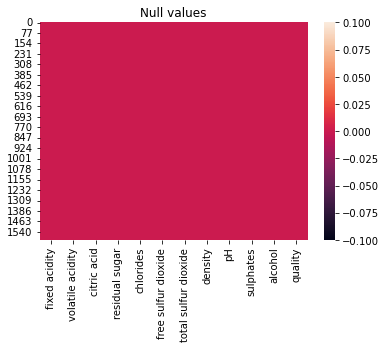

In [7]:
# cheaking the null values
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* No null value in data set

# Data Analysis and visulaization

In [9]:
# statsical summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<Figure size 360x360 with 0 Axes>

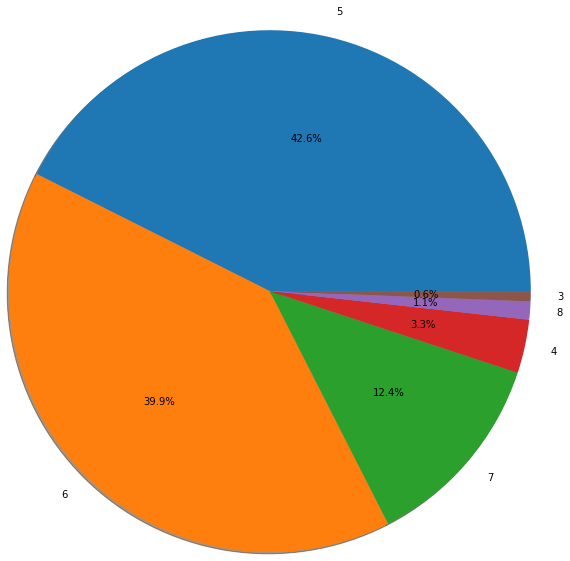

In [11]:
plt.figure(figsize=(5,5))
labels = '5','6','7','4','8','3'
fig, ax = plt.subplots()
ax.pie(df['quality'].value_counts(),labels = labels,radius =3 ,autopct = '%1.1f%%', shadow=True,)
plt.show()

* We have 6 different type of wine quality samples
* Majority of samples are of quality 5 and 6 
* 3 is bad quality
* 7 and 8 is in good quality category

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

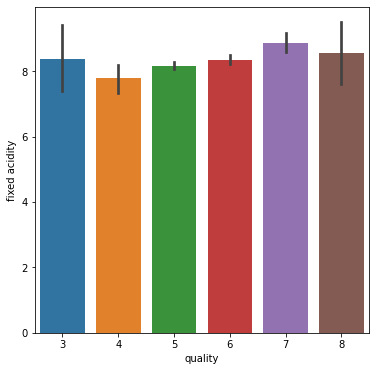

In [13]:
#fixed acidity vs qulity
plot = plt.figure(figsize=(6,6))
sns.barplot(x= 'quality', y = 'fixed acidity', data = df)
plt.show()

* fixed acidity is almost same in all quality of wine

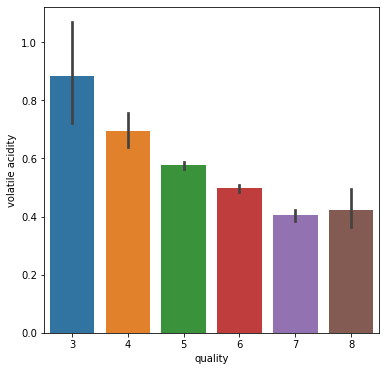

In [14]:
#acidity vs qulity
plot = plt.figure(figsize=(6,6))
sns.barplot(x= 'quality', y = 'volatile acidity', data = df)
plt.show()

* volatile acidity available in bad quality wine more that good one
* volatile acidity is more the quality of wine is less

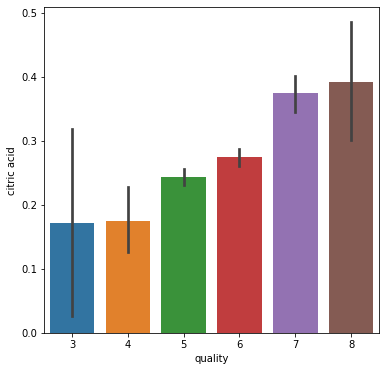

In [15]:
#citric acid vs qulity
plot = plt.figure(figsize=(6,6))
sns.barplot(x= 'quality', y = 'citric acid', data = df)
plt.show()

* This is opoosite to volatile acidity
* If the citric acid content low the qulity of wine is low
* and if the citric acid high the qulity of wine is also high

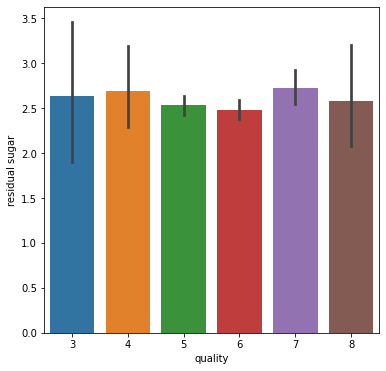

In [16]:
#residual sugar vs qulity
plot = plt.figure(figsize=(6,6))
sns.barplot(x= 'quality', y = 'residual sugar', data = df)
plt.show()

* residual sugar is almost same in all quality of wine

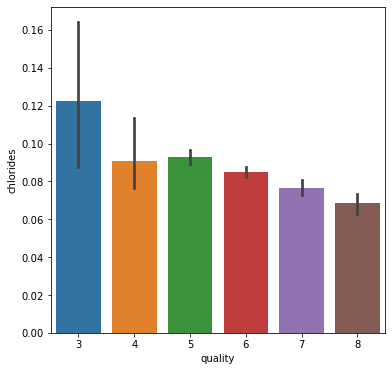

In [17]:
#chlorides vs qulity
plot = plt.figure(figsize=(6,6))
sns.barplot(x= 'quality', y = 'chlorides', data = df)
plt.show()

* The high chlorides the low wine quality is

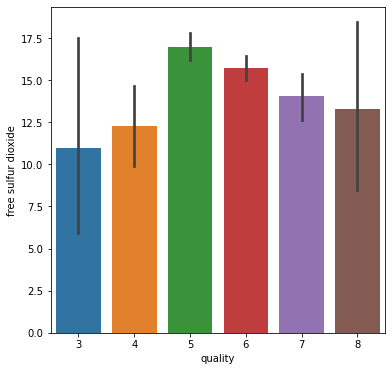

In [18]:
#free sulfur dioxide vs qulity
plot = plt.figure(figsize=(6,6))
sns.barplot(x= 'quality', y = 'free sulfur dioxide', data = df)
plt.show()

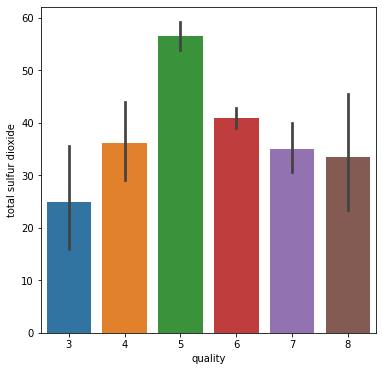

In [19]:
#total sulfur dioxide vs qulity
plot = plt.figure(figsize=(6,6))
sns.barplot(x= 'quality', y = 'total sulfur dioxide', data = df)
plt.show()

* total sulfur dioxide used more in averge qualite wine

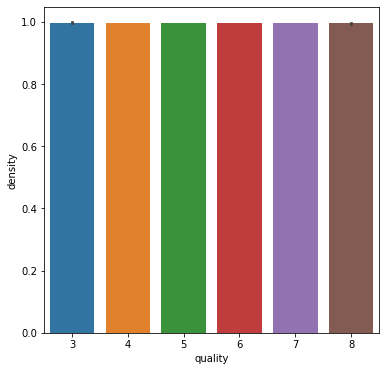

In [20]:
#density vs qulity
plot = plt.figure(figsize=(6,6))
sns.barplot(x= 'quality', y = 'density', data = df)
plt.show()

* Density is similar in every type of wine

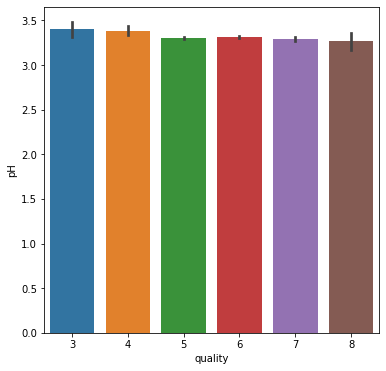

In [21]:
#pH vs qulity
plot = plt.figure(figsize=(6,6))
sns.barplot(x= 'quality', y = 'pH', data = df)
plt.show()

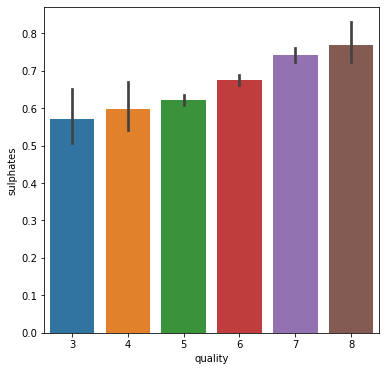

In [22]:
#sulphates vs qulity
plot = plt.figure(figsize=(6,6))
sns.barplot(x= 'quality', y = 'sulphates', data = df)
plt.show()

* The more sulphates the more quality is

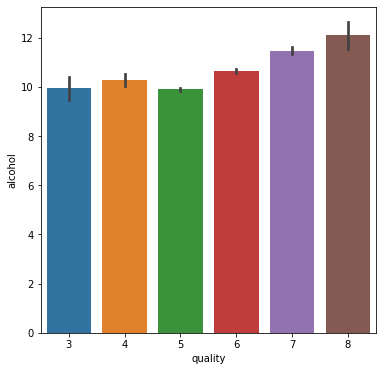

In [23]:
#alcohol vs qulity
plot = plt.figure(figsize=(6,6))
sns.barplot(x= 'quality', y = 'alcohol', data = df)
plt.show()

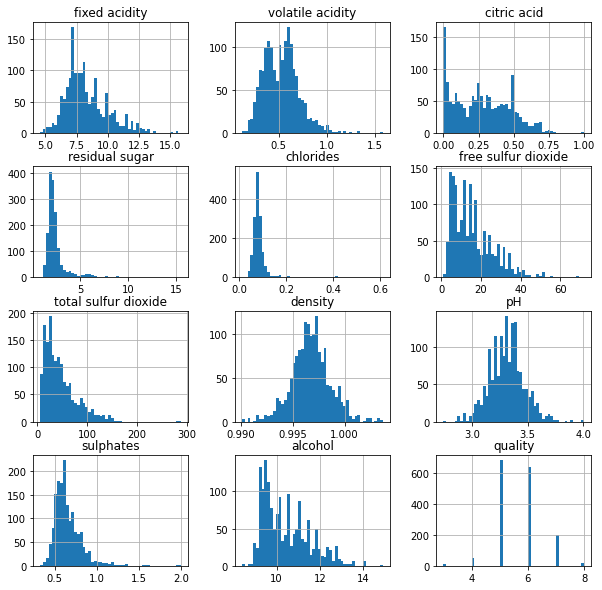

In [24]:
df.hist(figsize=(10,10),bins=50)
plt.show()

## constructing a heatmap to undestand the correlation

In [25]:
correlation = df.corr()

<AxesSubplot:>

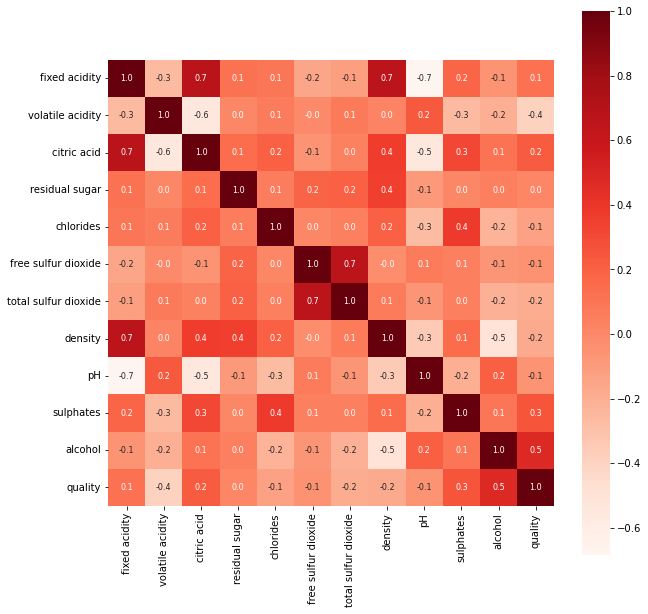

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar= True, square=True, fmt='.1f',annot =True, annot_kws={'size':8}, cmap = 'Reds')

## data preprocessing


In [27]:
# separate the data and label
X = df.drop("quality",axis=1)

In [28]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


## Feature Selection


In [29]:
df['g_quality'] = [1 if x >= 7 else 0 for x in df['quality']]
X = df.drop(['quality','g_quality'], axis = 1)
Y = df['g_quality']

In [30]:
df['g_quality'].value_counts()

0    1382
1     217
Name: g_quality, dtype: int64

In [31]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [32]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: g_quality, Length: 1599, dtype: int64

## Splitting Dataset


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [34]:
print(Y.shape, y_train.shape, y_test.shape)

(1599,) (1279,) (320,)


## Model Training
### random forest classifier


Random forest is one of the versatile algorithm in machine learning. It is believed that random forest is one of the best algorithm we can see in ML. Because it avoids bias, at the same time it is doesn't depend on only one model but uses multiple models to make any decision, that is the reason random forest is the favourite algorithm of any data scientist.

Random Forests are a combination of tree predictors where each tree depends on the values of a random vector sampled independently with the same distribution for all trees in the forest. The basic principle is that a group of “weak learners” can come together to form a “strong learner”.

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [36]:
model = RandomForestClassifier()

In [38]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
model.score(X_test,y_test)

0.90625

### Building a predictive system

In [40]:
input_data = (8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.3,0.75,10.5)

# changing the input data to nummpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we predicting the lable for one value
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Good Quality wine')
    
else:
    print('bad Quality wine')

[1]
Good Quality wine


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
input_data = (7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5)

# changing the input data to nummpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we predicting the lable for one value
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Good Quality wine')
    
else:
    print('bad Quality wine')

[0]
bad Quality wine


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
